<a href="https://colab.research.google.com/github/hbansal90/SMS_SpamDetection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns

In [41]:
column_names=['A','B']
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMSSpamCollection.csv",
               on_bad_lines='skip',names=column_names)
df.head()


,A,B
0,ham\tGo until jurong point,crazy.. Available only in bugis n great world...
1,ham\tOk lar... Joking wif u oni...,NaN
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,NaN
3,ham\tU dun say so early hor... U c already the...,NaN
4,ham\tNah I don't think he goes to usf,he lives around here though


In [42]:
df=df.drop('B',axis=1) # to remove the unwanted series no column
df.head()

,A
0,ham\tGo until jurong point
1,ham\tOk lar... Joking wif u oni...
2,spam\tFree entry in 2 a wkly comp to win FA Cu...
3,ham\tU dun say so early hor... U c already the...
4,ham\tNah I don't think he goes to usf


DATA CLEANING

In [43]:
df[['Target','Text']]=df['A'].str.split('\t',expand=True)
#Creating two separate columns as Target and text for better processing
df.head()


,A,Target,Text
0,ham\tGo until jurong point,ham,Go until jurong point
1,ham\tOk lar... Joking wif u oni...,ham,Ok lar... Joking wif u oni...
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham\tU dun say so early hor... U c already the...,ham,U dun say so early hor... U c already then say...
4,ham\tNah I don't think he goes to usf,ham,Nah I don't think he goes to usf


In [44]:
df.drop('A',axis=1,inplace=True)
df.head()

,Target,Text
0,ham,Go until jurong point
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf


In [45]:
df.shape

(5205, 2)

Using Label Encoder to convert ham and spam into binary encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Target']=lab.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,Go until jurong point
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,Nah I don't think he goes to usf


In [47]:
df.isnull().sum()#checking for missing values

Target    0
Text      0
dtype: int64

In [48]:
#count number of duplicate values
df.duplicated().sum()

483

In [49]:
#drop dubplicates but keep only their first copies
df=df.drop_duplicates(keep='first')

In [50]:
df.shape

(4722, 2)

Exploratory Data Analysis

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4722 entries, 0 to 5204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  4722 non-null   int64 
 1   Text    4722 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.7+ KB


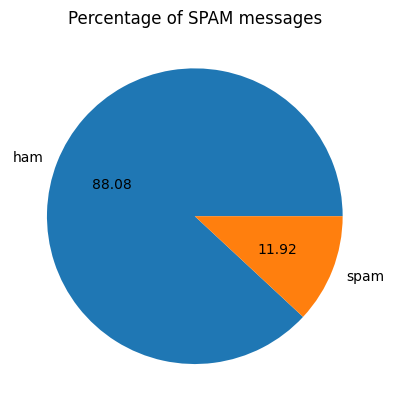

In [52]:
grouping=df.groupby('Target')
df['Target'].value_counts()
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.title('Percentage of SPAM messages')
plt.show()

In [53]:
nltk.download('punkt')
df['num_char']=df['Text'].apply(len)
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sent']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Target,Text,num_char,num_words,num_sent
0,0,Go until jurong point,21,4,1
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,Nah I don't think he goes to usf,32,9,1
...,...,...,...,...,...
5200,1,This is the 2nd time we have tried 2 contact u...,96,23,2
5201,0,Will ü b going to esplanade fr home?,36,9,1
5202,0,Pity,4,1,1
5203,0,The guy did some bitching but I acted like i'd...,125,27,1


In [54]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4722.000000,4722.000000,4722.000000
mean,65.983905,15.365311,1.824227
std,50.262536,11.310215,1.305497
min,0.000000,0.000000,0.000000
25%,30.000000,8.000000,1.000000
50%,49.000000,12.000000,1.000000
75%,89.000000,21.000000,2.000000
max,910.000000,220.000000,38.000000


In [55]:
df[df['Target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,563.000000,563.000000,563.000000
mean,120.268206,23.943162,2.701599
std,42.588583,8.988544,1.432881
min,2.000000,1.000000,1.000000
25%,91.000000,18.000000,2.000000
50%,137.000000,27.000000,3.000000
75%,154.000000,31.000000,4.000000
max,183.000000,45.000000,9.000000


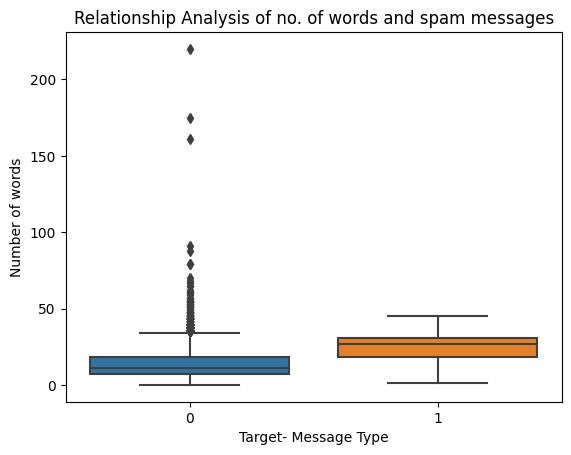

In [56]:
#Box Plot of nums_words and Target
sns.boxplot(x = 'Target', y = 'num_words', data = df)
plt.xlabel('Target- Message Type')
plt.ylabel('Number of words')
plt.title('Relationship Analysis of no. of words and spam messages')
plt.show()

<Axes: ylabel='Count'>

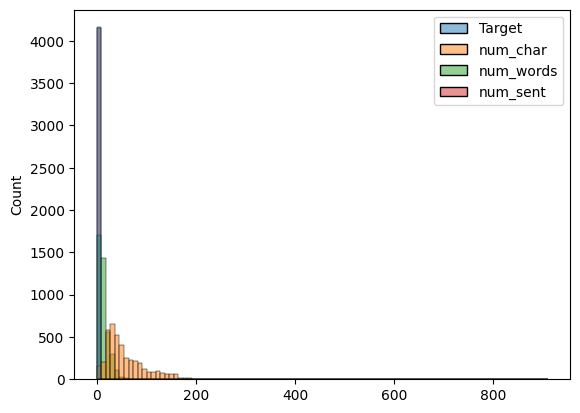

In [57]:
sns.histplot(df[df['Target']==0],bins=100)

<Axes: xlabel='num_char', ylabel='Count'>

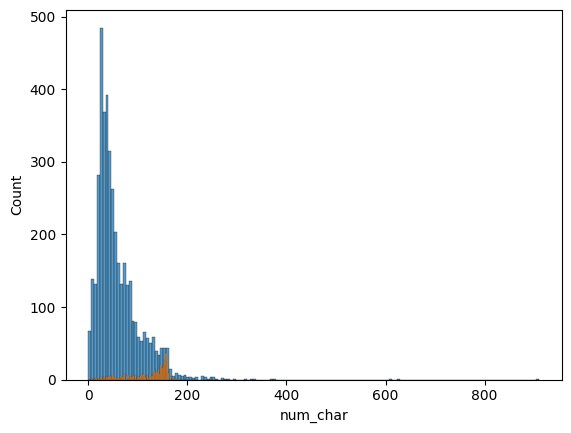

In [58]:
sns.histplot(df[df['Target']==0]['num_char'])#histogram for ham
sns.histplot(df[df['Target']==1]['num_char'],bins=100)


<Axes: xlabel='num_char', ylabel='Count'>

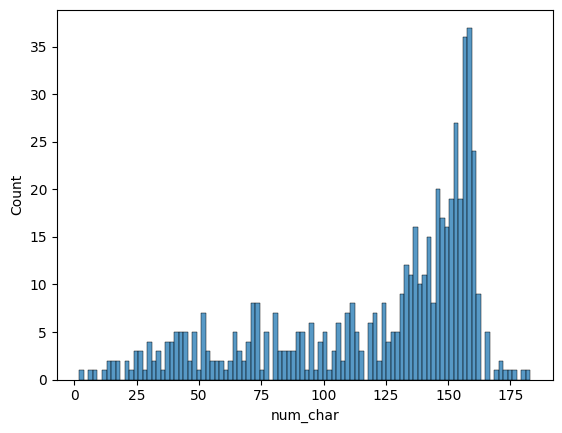

In [59]:
sns.histplot(df[df['Target']==1]['num_char'],bins=100)

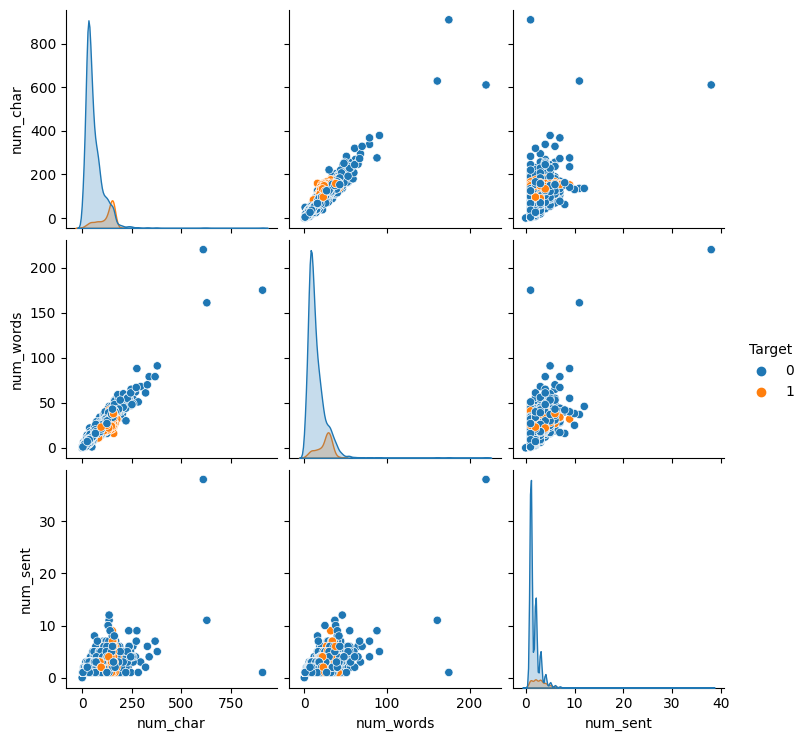

In [60]:
sns.pairplot(df,hue='Target')#checking the relation between the two.

Preprocessing stage- tokenization, removing punctuation,stemming

In [61]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
#first import porter stemmer---present few cells below before running this cell

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
import string
punc=string.punctuation
def preprocess(text):#function to lowercase,tokenize,retain only alphanumeric values, stemming
    text=text.lower()
    text=nltk.word_tokenize(text)
    [word for word in text if word not in punc]
    arr=[]
    for i in text:
        if i.isalnum():
            arr.append(i)
    text=arr[:]
    arr.clear()
    '''need to clear the arr everytime before applying another function
    so that the processed text doesnt get appended multiple times'''
    for i in text:
        arr.append(ps.stem(i))
    text=arr[:]
    arr.clear()
    for i in text:
        if i not in stopwords.words('english'):
            arr.append(i)
    return arr

In [63]:
df['Text'][8]

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [64]:
random=df['Text'][8]
random

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [65]:
from nltk.corpus import stopwords

In [66]:
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
""""
def remove_stopwords(text):                #function to remove stopwords.
    text=text.lower()
    text=nltk.word_tokenize(text)
    arr=[]
    for i in text:
        if i not in stopwords.words('english'):
            arr.append(i)
    return arr
"""

'"\ndef remove_stopwords(text):                #function to remove stopwords.\n    text=text.lower()\n    text=nltk.word_tokenize(text)\n    arr=[]\n    for i in text:\n        if i not in stopwords.words(\'english\'):\n            arr.append(i)\n    return arr\n'

In [68]:
df['Text'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [69]:
preprocess(df['Text'][6])# first import porter stemmer before running this command---in the below present cell.

['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']

In [70]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [71]:
ps.stem('running')
#example of how stemming works

'run'

In [72]:
preprocess(df['Text'][32])

['fear', 'faint', 'housework', 'quick', 'cuppa']

In [73]:
df['preprocessed_text']=df['Text'].apply(preprocess)
'''
We first apply 'type' function on the pre
processed text column to check the type, then use the 'astype'
to convert all data into same data type
'''
df['preprocessed_text']=df['preprocessed_text'].astype(str)

In [74]:
df.head()

,Target,Text,num_char,num_words,num_sent,preprocessed_text
0,0,Go until jurong point,21,4,1,"['go', 'jurong', 'point']"
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,Nah I don't think he goes to usf,32,9,1,"['nah', 'think', 'goe', 'usf']"


Building a Word Cloud to show the spread of words in ham and spam categories

Text(0.5, 1.0, 'Word Cloud for Spam Messages')

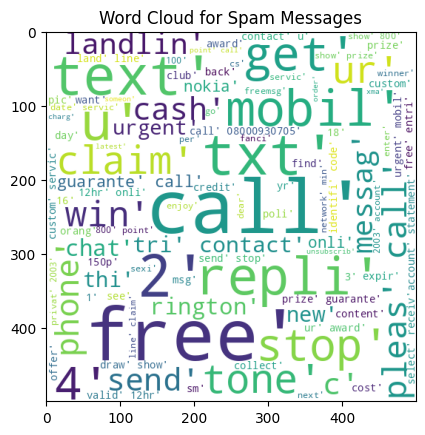

In [132]:
!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,max_font_size=100,max_words=100,background_color='white')
spamwc=wc.generate(df[df['Target']==1]['preprocessed_text'].str.cat(sep=" "))
plt.imshow(spamwc)#shows frequenly occuring words in spam messages.
plt.title('Word Cloud for Spam Messages')

In [76]:
df['preprocessed_text']=df['preprocessed_text'].astype(str)

Text(0.5, 1.0, 'Word Cloud for Ham Messages')

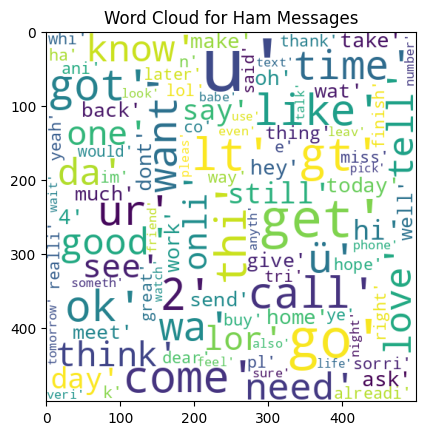

In [133]:
hamwc=wc.generate(df[df['Target']==0]['preprocessed_text'].str.cat(sep=" "))
plt.imshow(hamwc)
plt.title('Word Cloud for Ham Messages')

To get a better idea of top frequent words in ham and spam messages, we check their frequencies

In [140]:
# Extract preprocessed text for spam messages
spam_messages = df[df['Target'] == 1]['preprocessed_text'].tolist()

# Initialize an empty list to store individual words
sp = []

# Iterate through each preprocessed message and split it into words
for msg in spam_messages:
    for word in msg.split():
        sp.append(word)

# Import Counter from collections and count occurrences of each word
from collections import Counter
word_counts = Counter(sp)

# Display the top 25 words in a DataFrame
import pandas as pd
top_25_words_df = pd.DataFrame(word_counts.most_common(25))
top_25_words_df


,0,1
0,"'call',",225
1,"'free',",127
2,"'2',",119
3,"'txt',",101
4,"'ur',",84
5,"'mobil',",81
6,"'repli',",81
7,"'u',",80
8,"'text',",78
9,"'4',",74


In [83]:
top_item=[item for item,count in Counter(sp).most_common(25)]
count_item=[count for item,count in Counter(sp).most_common(25)]# due to above error we do like this

<Figure size 1500x800 with 0 Axes>

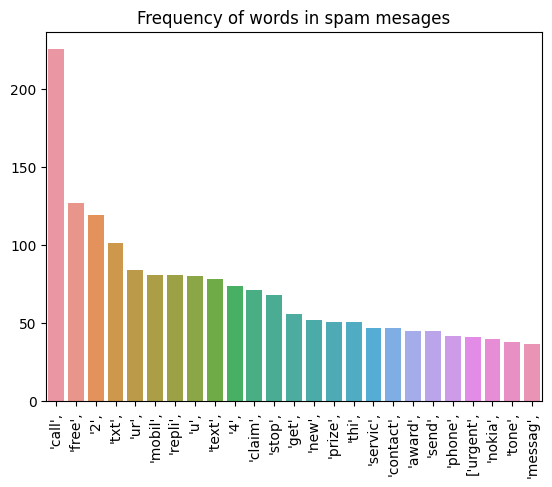

<Figure size 1500x800 with 0 Axes>

In [143]:
sns.barplot(x=top_item,y=count_item)
plt.xticks(rotation='vertical')
plt.title('Frequency of words in spam mesages')
plt.figure(figsize=(15,8))


MODEL BUILDING

In [85]:
from sklearn.feature_extraction.text import CountVectorizer#using bag of words

In [86]:
cv=CountVectorizer()

In [87]:
x=cv.fit_transform(df['preprocessed_text']).toarray()#toarray used to convert sparse array to dense array

In [88]:
y=df['Target'].values

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [92]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [95]:
print(accuracy_score(y_test,y_pred1))

0.8405081157374735


In [96]:
print(precision_score(y_test,y_pred1))#very low precision score

0.4230769230769231


In [97]:
print(confusion_matrix(y_test,y_pred1))

[[1037  210]
 [  16  154]]


In [98]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)

In [99]:
print(accuracy_score(y_test,y_pred2))

0.9703599153140438


In [100]:
print(precision_score(y_test,y_pred2))

0.8636363636363636


In [101]:
print(confusion_matrix(y_test,y_pred2))

[[1223   24]
 [  18  152]]


In [102]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)

In [103]:
print(accuracy_score(y_test,y_pred3))

0.958362738179252


In [104]:
print(precision_score(y_test,y_pred3))#good precision---check with tfidf if more precision can be achieved

0.9663865546218487


In [105]:
print(confusion_matrix(y_test,y_pred3))

[[1243    4]
 [  55  115]]


In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [107]:
tfidf=TfidfVectorizer()

In [108]:
x=tfidf.fit_transform(df['preprocessed_text']).toarray()

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [110]:
gnb.fit(x_train,y_train)
y_pred01=gnb.predict(x_test)

In [111]:
print(accuracy_score(y_test,y_pred01))

0.8383909668313339


In [112]:
print(precision_score(y_test,y_pred01))

0.4173669467787115


In [113]:
print(confusion_matrix(y_test,y_pred01))

[[1039  208]
 [  21  149]]


In [114]:
mnb.fit(x_train,y_train)
y_pred02=mnb.predict(x_test)

In [115]:
print(accuracy_score(y_test,y_pred02))

0.9442484121383204


In [116]:
print(precision_score(y_test,y_pred02))#improved precision with tfidf

1.0


In [117]:
print(confusion_matrix(y_test,y_pred02))

[[1247    0]
 [  79   91]]


In [118]:
print(confusion_matrix(y_test,y_pred02))

[[1247    0]
 [  79   91]]


In [119]:
bnb.fit(x_train,y_train)
y_pred03=bnb.predict(x_test)

In [120]:
print(accuracy_score(y_test,y_pred03))

0.958362738179252


In [121]:
print(precision_score(y_test,y_pred03))

0.9663865546218487


In [122]:
print(confusion_matrix(y_test,y_pred03))

[[1243    4]
 [  55  115]]


In [123]:
"""
now we can choose either bernoulli naive bayes with bag of words or multinomial naive bayes with tfidf
"""


'\nnow we can choose either bernoulli naive bayes with bag of words or multinomial naive bayes with tfidf\n'

TESTING DIFFERENT MODELS ON THE DATA

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB#comparing multinomial nb with other classifiers

In [125]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
bc=BaggingClassifier(n_estimators=60,random_state=2)
et=ExtraTreesClassifier(n_estimators=60,random_state=2)
adc=AdaBoostClassifier(n_estimators=60,random_state=2)
gdc=GradientBoostingClassifier(n_estimators=60,random_state=2)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=60,random_state=2)

In [126]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': adc,
    'BgC': bc,
    'ETC': et,
    'GBDT':gdc,
}##preparing a dictionary of all the objects so that we can iterate over it using a function and apply all classifiers one by one

In [127]:
def fit_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)

    return accuracy,precision,cm

In [128]:
accuracy_scores = []
precision_scores = []
confusion_scores=[]
for name,clf in clfs.items():

    current_accuracy,current_precision,current_confusion = fit_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Confusion matrix - ", current_confusion)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    confusion_scores.append(current_confusion)

For  SVC
Accuracy -  0.9682427664079041
Precision -  0.9629629629629629
Confusion matrix -  [[1242    5]
 [  40  130]]
For  KN
Accuracy -  0.9004940014114327
Precision -  1.0
Confusion matrix -  [[1247    0]
 [ 141   29]]
For  NB
Accuracy -  0.9442484121383204
Precision -  1.0
Confusion matrix -  [[1247    0]
 [  79   91]]
For  DT
Accuracy -  0.9329569513055752
Precision -  0.8504672897196262
Confusion matrix -  [[1231   16]
 [  79   91]]
For  LR
Accuracy -  0.9470712773465068
Precision -  0.9130434782608695
Confusion matrix -  [[1237   10]
 [  65  105]]
For  RF
Accuracy -  0.9661256175017643
Precision -  0.9765625
Confusion matrix -  [[1244    3]
 [  45  125]]
For  AdaBoost
Accuracy -  0.9562455892731122
Precision -  0.921875
Confusion matrix -  [[1237   10]
 [  52  118]]
For  BgC
Accuracy -  0.958362738179252
Precision -  0.8827586206896552
Confusion matrix -  [[1230   17]
 [  42  128]]
For  ETC
Accuracy -  0.9682427664079041
Precision -  0.9629629629629629
Confusion matrix -  [[1242

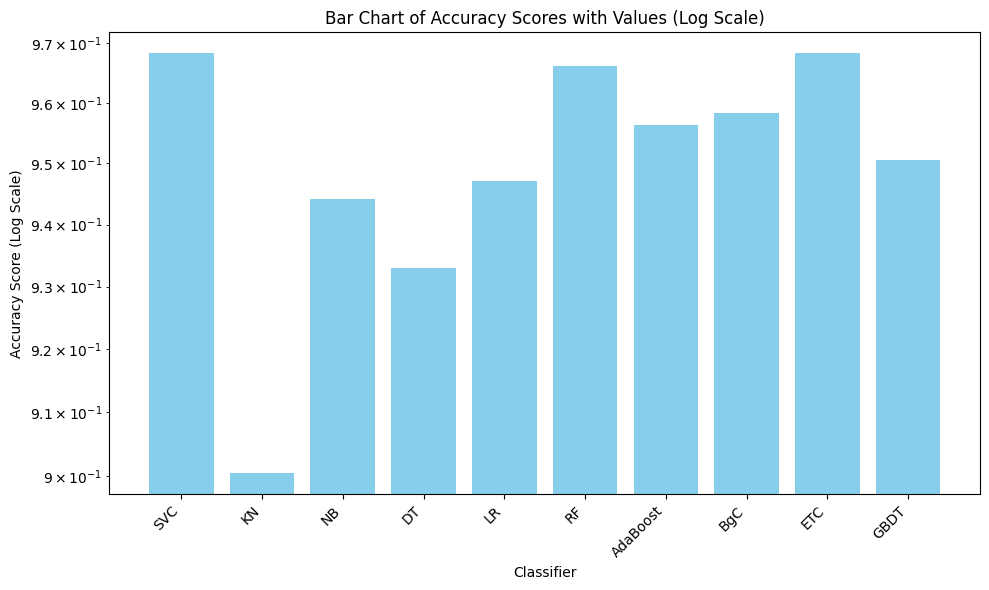

In [129]:
# Extract classifier names and corresponding scores
classifier_names = list(clfs.keys())
accuracy_scores = accuracy_scores

# Create bar chart for accuracy scores with values inside bars
plt.figure(figsize=(10, 6))
plt.yscale('log')
bars = plt.bar(classifier_names, accuracy_scores, color='skyblue')

# Add value labels to each bar using annotate() function
for bar, accuracy in zip(bars, accuracy_scores):
    yval = bar.get_height() / 2
    plt.annotate(round(accuracy, 4), (bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, -5), textcoords='offset points', ha='center', va='center', fontsize=8)

plt.xlabel('Classifier')
plt.ylabel('Accuracy Score (Log Scale)')
plt.title('Bar Chart of Accuracy Scores with Values (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

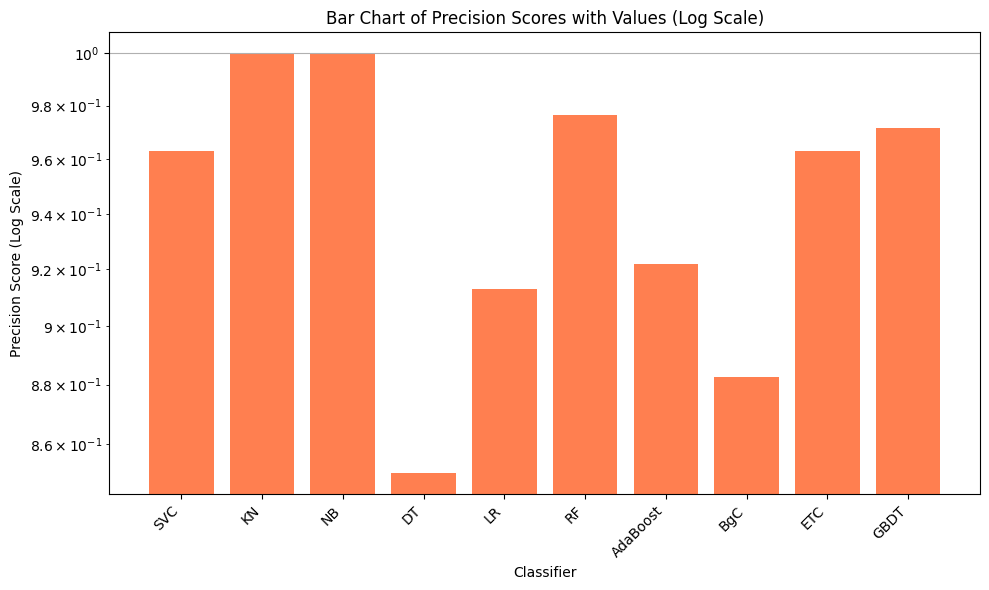

In [130]:
classifier_names = list(clfs.keys())
precision_scores = precision_scores

# Create bar chart for precision scores with values inside bars
plt.figure(figsize=(10, 6))
plt.yscale('log')
bars = plt.bar(classifier_names, precision_scores, color='coral')

# Add value labels to each bar using annotate() function
for bar, precision in zip(bars, precision_scores):
    yval = bar.get_height() / 2
    plt.annotate(round(precision, 4), (bar.get_x() + bar.get_width() / 2, yval),
                 xytext=(0, -5), textcoords='offset points', ha='center', va='center', fontsize=8)

plt.xlabel('Classifier')
plt.ylabel('Precision Score (Log Scale)')
plt.title('Bar Chart of Precision Scores with Values (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [131]:
#now we have obtained accuracy values after applying all these models, we can use the one with most accuracy
#or the one with most precision according to our requirements.